In [2]:
%matplotlib inline
from collections import Counter
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from datetime import datetime

/Users/yupei/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
cang = pd.read_csv('adult.csv')

In [4]:
cang.replace('?',np.nan,inplace=True)

In [5]:
cang.dropna(axis=0,how='any',inplace=True)

In [6]:
cang.index=range(len(cang))

In [7]:
del cang['capitalloss']

In [8]:
del cang['capitalgain']

In [9]:
cang['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [10]:
def StringToNum(s):
    if s.isalpha():
        return ord(s)

In [11]:
def Numadd(a):
    b=0
    for x in a: 
        if x!="-":
            b=b+StringToNum(x)
    return b

In [12]:
for i in range(0,30162):
    cang.loc[i,'workclass']=Numadd(cang['workclass'][i])

In [13]:
cang

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,income
0,82,731,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
1,54,731,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
2,41,731,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
3,34,731,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
4,38,731,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
5,74,845,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,20,United-States,>50K
6,68,1023,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K
7,45,731,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,35,United-States,>50K
8,38,1367,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,45,United-States,>50K
9,52,731,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,20,United-States,>50K


In [14]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

Counter({1: 14070, 0: 10674, 2: 5418})


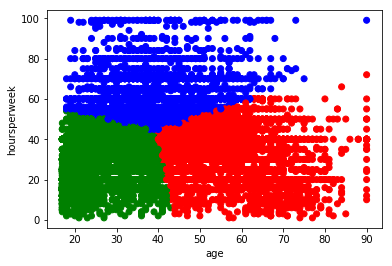

In [15]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = cang[["age", "hoursperweek"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(cang["age"], cang["hoursperweek"], c=colors)
plt.xlabel("age")
plt.ylabel("hoursperweek")
plt.show()

In this image, we can see that the half part of people's work hour is above 55 per week and this part is not be influence by age. And in other part, people has same work hours per week but clearly the 45-90 years old people is more than 15-45 years old people.

Counter({0: 26615, 1: 1402, -1: 1208, 3: 247, 2: 238, 8: 46, 18: 46, 6: 32, 10: 25, 7: 20, 17: 20, 11: 19, 16: 18, 4: 17, 5: 17, 22: 16, 27: 16, 9: 14, 20: 14, 21: 14, 30: 12, 13: 11, 26: 11, 14: 10, 15: 10, 24: 10, 29: 10, 23: 8, 12: 7, 28: 6, 32: 6, 19: 5, 25: 5, 31: 5, 33: 2})


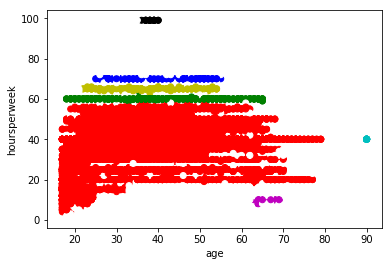

In [16]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=10)
X = cang[["age", "hoursperweek"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print Counter(labels)

colors = set_colors(labels)
plt.scatter(cang['age'], cang['hoursperweek'], c=colors)
plt.xlabel("age")
plt.ylabel("hoursperweek")
plt.show()

Counter({0: 16062, 1: 10792, 2: 3308})


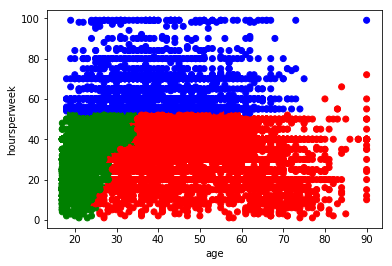

In [17]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=3)
X = cang[["age", "hoursperweek"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(cang['age'], cang['hoursperweek'], c=colors)
plt.xlabel("age")
plt.ylabel("hoursperweek")
plt.show()

### 1.Do the clustering methods generate the same clusters?
#### No. Different method give me different clusters.

### 2.Does scaling effect the clustering?  
#### Yes. When the scaling change,  the clusters will change the centre point and we need to modify factors to get better result.

### 3.Does the clustering produce interesting groupings?
#### Yes. We can see the groups which can show us where they cluster.

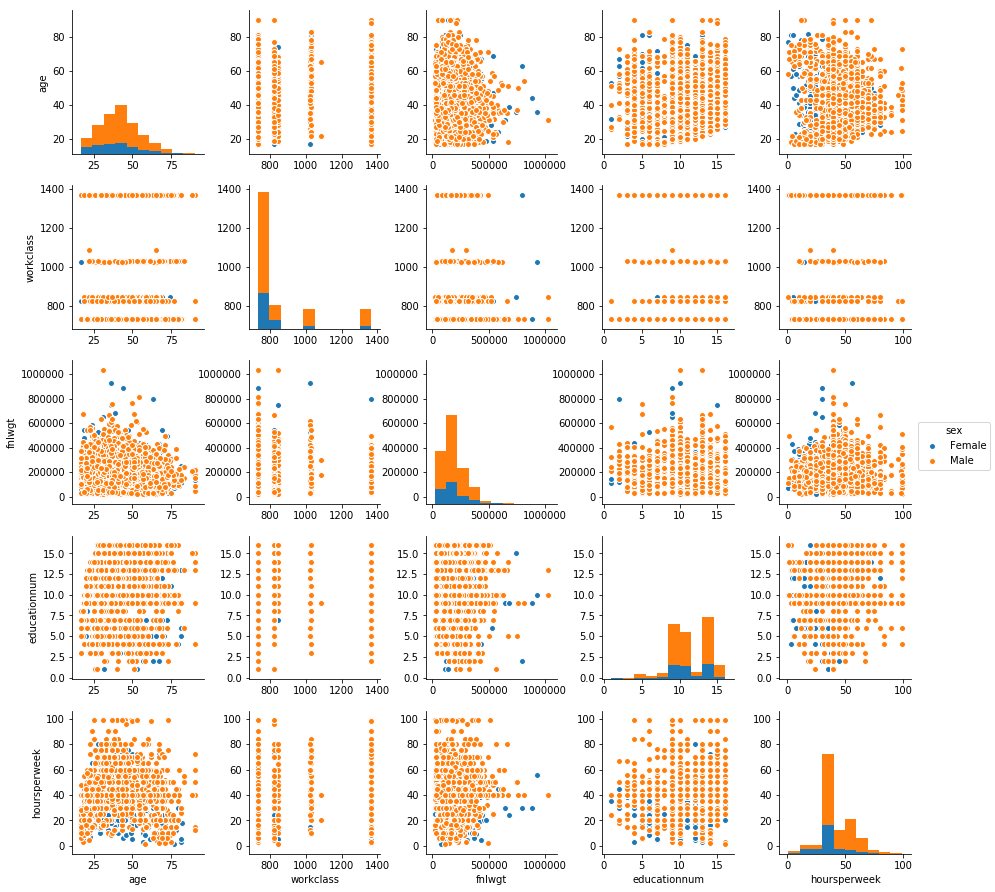

In [18]:
sns.pairplot(cang[:5000], hue="sex")

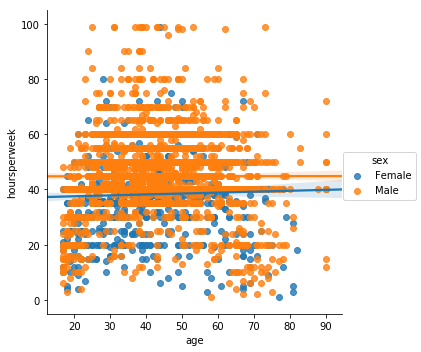

In [19]:
sns.lmplot(y="hoursperweek", x="age", data=cang[:5000],  hue="sex")

In [20]:
cang["workclass"]=cang["workclass"].astype(int)

In [21]:
type(cang["workclass"][0])

numpy.int64

# Linear Regression model

In [22]:
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression



In [23]:
X = cang[["age"]]
y = cang[["hoursperweek"]]
# import statsmodels.api as sm
# Note the swap of X and y
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

(array([ 37.36930837]), array([[ 0.09266712]]))


In [24]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           hoursperweek   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 1.603e+05
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:08:48   Log-Likelihood:            -1.2820e+05
No. Observations:               30162   AIC:                         2.564e+05
Df Residuals:                   30161   BIC:                         2.564e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.9632      0.002    400.369      0.000       0.959       0.968
==============================================================================
Omnibus:                     2835.865   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7065.067
Skew:                          -0.558   Prob(JB):                         0.00
Kurtosis:                       5.092   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print(results.params,results.rsquared)

(age    0.963219
dtype: float64, 0.84163851458053962)


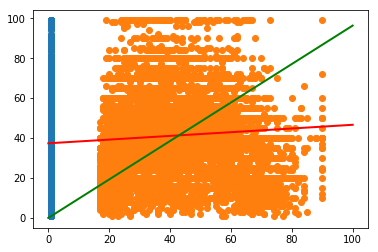

In [26]:
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(0, 100, 55)
y2 = 37.37 + (0.0927*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(0, 100, 55)
y2 = (0.963219*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [27]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           hoursperweek   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     314.6
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           5.01e-70
Time:                        14:08:49   Log-Likelihood:            -1.1754e+05
No. Observations:               30162   AIC:                         2.351e+05
Df Residuals:                   30160   BIC:                         2.351e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3693      0.212    176.079      0.000      36.953      37.785
age            0.0927      0.005     17.736      0.000       0.082       0.103
==============================================================================
Omnibus:                     2790.973   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13698.220
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                       6.237   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

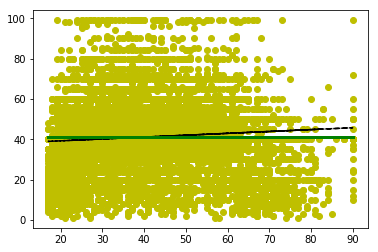

In [28]:
n=555
X = cang["age"]
y = cang["hoursperweek"]
fit= np.polyfit(X, y, 1)
fit_fn = np.poly1d(fit)
plt.plot(X,y, 'yo', X, fit_fn(X), '--k')
x2 = np.linspace(np.amin(X),np.amax(X),n)
y2 = np.ones(n)*np.mean(y)
plt.plot(x2, y2, lw=3, color="g")
plt.show()

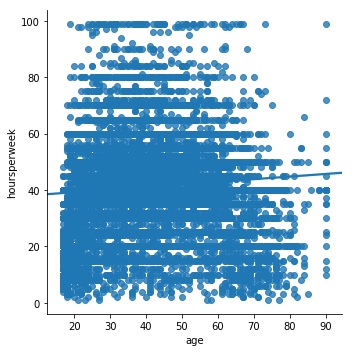

In [30]:
sns.lmplot(x='age', y='hoursperweek', data=cang, ci=None)

In [31]:
type(cang['fnlwgt'][0])

numpy.int64

## Multivariate linear mode
#### Is there any multi-colinearity in the model?

We can see the imgae under this line. And this image tell me that these feature has little relationship between each other. When we study one feature impression to data and then add one more feature in it, the accuracy will increase. So, this appearance can approve that these data has multi-colinearity.

#### In the multiple regression models are predictor variables independent of all the other predictor variables?  

We can see the image under this line. The image tell me that they have low correlation between each other. So, they are independent.

### We can see the correlation in this image.

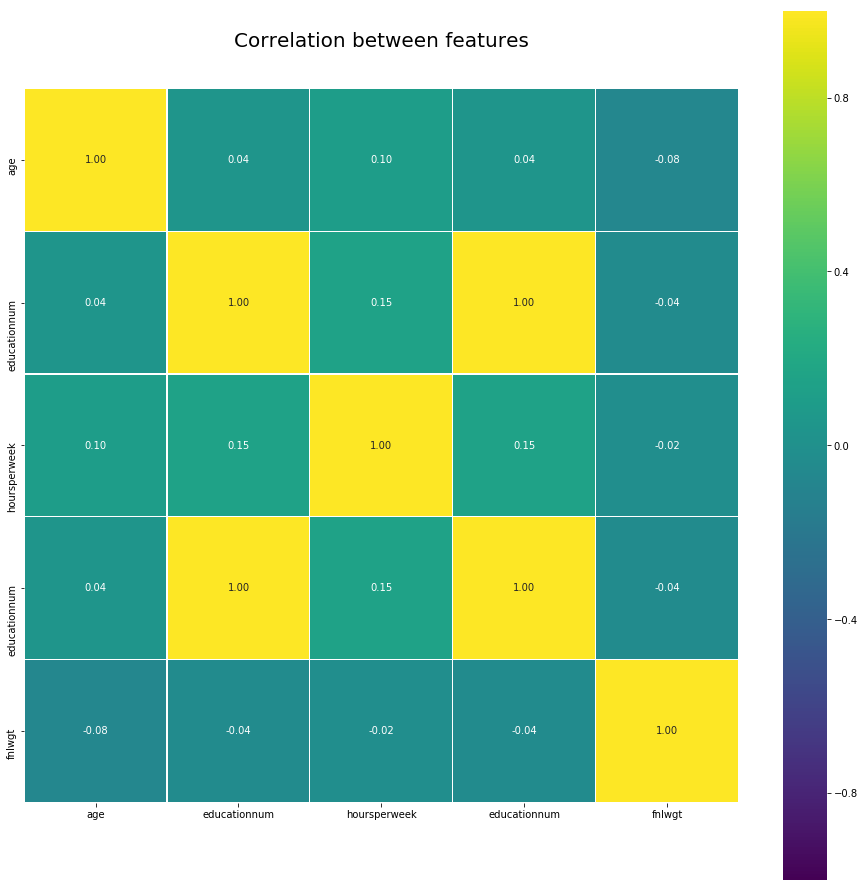

In [32]:
num_features = ['age','educationnum','hoursperweek','educationnum','fnlwgt']
test = cang[num_features]
colormap = plt.cm.viridis
plt.figure(figsize = (16,16))
plt.title('Correlation between features', y=1.05, size = 20)
sns.heatmap(test.corr(),
            linewidths=0.1, 
            center = 0,
            vmin = -1,
            vmax = 1, 
            annot = True,
            square = True, 
            fmt ='.2f', 
            annot_kws = {'size': 10},
            cmap = colormap, 
            linecolor ='white');

In [72]:
cang1 = ols("cang['hoursperweek'] ~ age+fnlwgt+educationnum+workclass-1", data=cang).fit()
cang1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     cang['hoursperweek']   R-squared:                       0.915
Model:                              OLS   Adj. R-squared:                  0.915
Method:                   Least Squares   F-statistic:                 8.141e+04
Date:                  Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                          14:16:38   Log-Likelihood:            -1.1878e+05
No. Observations:                 30162   AIC:                         2.376e+05
Df Residuals:                     30158   BIC:                         2.376e+05
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.1706      0.005     32.297      0.000       0.160       0.181
fnlwgt         1.29e-05   6.36e-07     20.282      0.000    1.17e-05    1.42e-05
educationnum     1.5604      0.023     66.844      0.000       1.515       1.606
workclass        0.0190      0.000     58.005      0.000       0.018       0.020
==============================================================================
Omnibus:                     2066.978   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10650.026
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                       5.911   Cond. No.                     7.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Is the relationship significant?

#### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. 

When using the library from language r, it also has a function lm()to build a model and give a summary to the model, here is the code and the output of the window:

![r summary lm model](./rsummary.png)

## * Does the model make sense?  

We can see the image above this line. And we can see the significant value in it. The model is make sense.


## Are any model assumptions violated?

it shows that all the value are significant to the hoursperweek and the number of education has the closeast relationship to the hoursperweek.      

![r summary lm model](./residualplot.png)

The error term  has the following assumptions:  

1.have mean zero; otherwise the forecasts will be systematically biased.  
2.statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).  
3.homoscedasticity (constant variance) of the errors.  
4.normality of the error distribution.  

In [34]:
y = np.array(cang['hoursperweek'])

In [35]:
x = np.array(cang[['age','fnlwgt','educationnum','workclass']])

In [36]:
X = np.array([np.concatenate((v,[1])) for v in x])

In [37]:
#Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Compute RMSE on all data
y_pred = linreg.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

11.734273220703489

In [39]:
# Compute RMSE on all data
y_pred = linreg.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

11.734273220703489

## Cross-validate the model

 Cross-validate the model. How well did it do? 

In [40]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

Text(0.5,1,u'Original hours per week vs Predicted hours per week: $Y_i$ vs $\\hat{y}_i$')

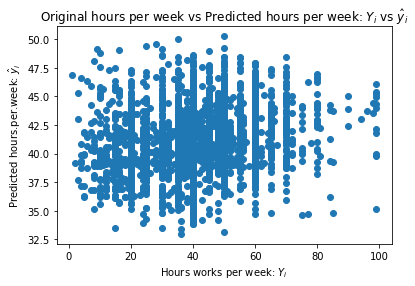

In [41]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Hours works per week: $Y_i$")
plt.ylabel("Predicted hours.per.week: $\hat{y}_i$")
plt.title("Original hours per week vs Predicted hours per week: $Y_i$ vs $\hat{y}_i$")

In [42]:
y_m=np.mean(y_test)

In [43]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

11.578845592382628

In [44]:
rmse/y_m

0.28341802972664215

### Lasso Regularization

*Does regularization help with creating models that validate better on out of sample data?   

In [45]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X), n_folds=5)

In [46]:
for train,test in kf:
    print (train)
    print (test)

[ 6033  6034  6035 ..., 30159 30160 30161]
[   0    1    2 ..., 6030 6031 6032]
[    0     1     2 ..., 30159 30160 30161]
[ 6033  6034  6035 ..., 12063 12064 12065]
[    0     1     2 ..., 30159 30160 30161]
[12066 12067 12068 ..., 18095 18096 18097]
[    0     1     2 ..., 30159 30160 30161]
[18098 18099 18100 ..., 24127 24128 24129]
[    0     1     2 ..., 24127 24128 24129]
[24130 24131 24132 ..., 30159 30160 30161]


In [47]:
scores = []
for train, test in kf:
    linreg.fit(X[train],y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
scores

[11.691429958707589,
 11.7428089589569,
 11.728378339237766,
 11.700630079842766,
 11.884666954972714]

In [48]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

In [49]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,30,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    lasso.fit(X,y)
    y_pred = lasso.predict(X)
    err = y_pred-y    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf:
        lasso.fit(X[train], y[train])
        y_pred = lasso.predict(X[test])
        err = y_pred - y[test]
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_cv

0.010	 11.7343		 11.7498
0.622	 11.7369		 11.7537
1.234	 11.7446		 11.7627
1.846	 11.7574		 11.7769
2.458	 11.7752		 11.7962
3.070	 11.7980		 11.8206
3.682	 11.8258		 11.8500
4.294	 11.8586		 11.8732
4.906	 11.8620		 11.8805
5.518	 11.8636		 11.8823
6.130	 11.8654		 11.8843
6.742	 11.8673		 11.8865
7.354	 11.8695		 11.8888
7.967	 11.8718		 11.8914
8.579	 11.8744		 11.8941
9.191	 11.8771		 11.8970
9.803	 11.8800		 11.9001
10.415	 11.8831		 11.9034
11.027	 11.8864		 11.9069
11.639	 11.8898		 11.9101
12.251	 11.8929		 11.9122
12.863	 11.8929		 11.9130
13.475	 11.8929		 11.9130
14.087	 11.8929		 11.9130
14.699	 11.8929		 11.9130
15.311	 11.8930		 11.9131
15.923	 11.8930		 11.9131
16.535	 11.8930		 11.9131
17.147	 11.8930		 11.9132
17.759	 11.8931		 11.9132
18.371	 11.8931		 11.9132
18.983	 11.8931		 11.9133
19.595	 11.8932		 11.9133
20.207	 11.8932		 11.9133
20.819	 11.8932		 11.9134
21.431	 11.8933		 11.9134
22.043	 11.8933		 11.9134
22.656	 11

In [50]:
import pylab as pl

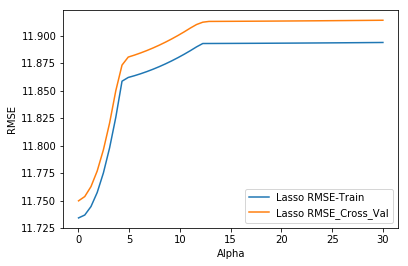

In [51]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
pl.legend( ('Lasso RMSE-Train', 'Lasso RMSE_Cross_Val') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

# Logistic Regression

In [52]:
cang_logistic=cang.replace('<=50K', 0)
cang_logistic=cang_logistic.replace('>50K', 1)
cang_logistic

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,income
0,82,731,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0
1,54,731,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0
2,41,731,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0
3,34,731,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,0
4,38,731,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,0
5,74,845,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,20,United-States,1
6,68,1023,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,40,United-States,0
7,45,731,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,35,United-States,1
8,38,1367,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,45,United-States,1
9,52,731,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,20,United-States,1


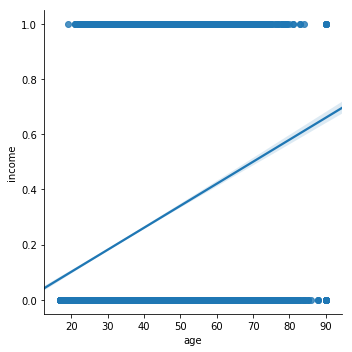

In [53]:
sns.lmplot(x="age", y=("income"), data=cang_logistic)

In [54]:
cang_logistic=cang_logistic[['workclass','age','hoursperweek','educationnum','fnlwgt','income']]

In [55]:
cang_logistic['intercept'] = 1.0

In [56]:
cang_logistic.head()

,workclass,age,hoursperweek,educationnum,fnlwgt,income,intercept
0,731,82,18,9,132870,0,1.0
1,731,54,40,4,140359,0,1.0
2,731,41,40,10,264663,0,1.0
3,731,34,45,9,216864,0,1.0
4,731,38,40,6,150601,0,1.0


In [57]:
pred=['age','fnlwgt','educationnum','hoursperweek','workclass','intercept']
pred

['age', 'fnlwgt', 'educationnum', 'hoursperweek', 'workclass', 'intercept']

In [58]:
income_model = sm.Logit(cang_logistic['income'], cang_logistic[pred]).fit()
income_model.summary()

Optimization terminated successfully.
         Current function value: 0.453917
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30156
Method:                           MLE   Df Model:                            5
Date:                Fri, 23 Feb 2018   Pseudo R-squ.:                  0.1911
Time:                        14:09:34   Log-Likelihood:                -13691.
converged:                       True   LL-Null:                       -16925.
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.0491      0.001     38.932      0.000       0.047       0.052
fnlwgt        6.144e-07   1.43e-07      4.284      0.000    3.33e-07    8.95e-07
educationnum     0.3454      0.007     51.362      0.000       0.332       0.359
hoursperweek     0.0423      0.001     31.121      0.000       0.040       0.045
workclass       -0.0001   7.99e-05     -1.437      0.151      -0.000    4.18e-05
intercept       -8.5737      0.128    -66.954      0.000      -8.825      -8.323
================================================================================
"""

In [59]:
income_model.conf_int()

,0,1
age,4.661364e-02,5.155581e-02
fnlwgt,3.333196e-07,8.954569e-07
educationnum,3.321811e-01,3.585386e-01
hoursperweek,3.959029e-02,4.491216e-02
workclass,-2.714913e-04,4.177337e-05
intercept,-8.824646e+00,-8.322685e+00


## Relationship significance

In [60]:
predictor_names=np.array(cang_logistic.columns)
predictor_names=predictor_names[0:5]

In [61]:
def rank_predictors(dat,l,f='income'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p][1]-median_vals[p][0])/max_vals[p])
        rank[p]=score
    return rank
income_rank=rank_predictors(cang_logistic,cang_logistic.columns[0:5]) 
income_rank

{'age': 0.10000000000000001,
 'educationnum': 0.1875,
 'fnlwgt': 0.0022384918216076595,
 'hoursperweek': 0.0,
 'workclass': 0.0}

## * Is the relationship significant?  
Yes. We can see it in the data: the age is the most significant factor.

In [62]:
income_rank=sorted(income_rank.items(), key=lambda x: x[1])
income_rank

[('workclass', 0.0),
 ('hoursperweek', 0.0),
 ('fnlwgt', 0.0022384918216076595),
 ('age', 0.10000000000000001),
 ('educationnum', 0.1875)]

In [63]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in income_rank[0:]:
    ranked_predictors.append(f[0])
ranked_predictors

['workclass', 'hoursperweek', 'fnlwgt', 'age', 'educationnum']

### Test Violated

![r summary glm model](./glmplot.png)

## * Are any model assumptions violated? 
We can see this image, ths assumption is like regular image. In first image, it's space and size things evenly in both side. And in the second imgae: the real line is almost likely the standard line.

### K cross fold validation

In [64]:
X = cang_logistic[cang_logistic.columns[0:5]]
#setting target
y = cang_logistic["income"]

In [65]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [66]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

# Logistic regression cross validation
Kfold = KFold(len(ranked_predictors), n_folds=4, shuffle=False)
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(lr,X,y,cv=10).mean())

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.

KfoldCrossVal mean score using Logistic regression is 0.751077525817


array([[ 0.74463871,  0.25536129],
       [ 0.69215706,  0.30784294],
       [ 0.75506818,  0.24493182],
       ..., 
       [ 0.68385719,  0.31614281],
       [ 0.79908722,  0.20091278],
       [ 0.69951597,  0.30048403]])

In [67]:
LRm.decision_function(X_test) # Predict confidence scores for samples.

array([-1.07021976, -0.81022316, -1.12582817, ..., -0.77155507,
       -1.38059922, -0.844994  ])

In [68]:
LRm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.75070445881
